<a href="https://colab.research.google.com/github/daningw/COMP5310/blob/main/Group9_Activity19_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Group Component 1

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('mlia0425_A1_CleanDataset.csv')
df2 = pd.read_csv('mlia0425_A1_CleanDataset.csv')

# Load the dataset
file_path = 'mlia0425_A1_CleanDataset.csv'
dataset = pd.read_csv(file_path)

In [ ]:
# Individual Component - mlia0425 - Logistic Regression/XGBoost

In [2]:
import pandas as pd

# Load the dataset to analyze its structure
file_path = 'mlia0425_A1_CleanDataset.csv'
data = pd.read_csv(file_path)

# Check data types and missing values
data_info = data.dtypes
missing_values = data.isnull().sum()
total_rows = data.shape[0]
missing_percentage = (missing_values / total_rows) * 100

# Count the number of columns for different data types
string_columns = data.select_dtypes(include='object').columns
integer_columns = data.select_dtypes(include='int64').columns
float_columns = data.select_dtypes(include='float64').columns

string_count = len(string_columns)
integer_count = len(integer_columns)
float_count = len(float_columns)

# Return the insights
{
    "total_rows": total_rows,
    "total_columns": data.shape[1],
    "string_columns_count": string_count,
    "integer_columns_count": integer_count,
    "float_columns_count": float_count,
    "missing_values_percentage": missing_percentage
}

{'total_rows': 88592,
 'total_columns': 31,
 'string_columns_count': 14,
 'integer_columns_count': 8,
 'float_columns_count': 9,
 'missing_values_percentage': Unnamed: 0               0.000000
 Record_ID                0.000000
 Customer_ID              0.000000
 Record_Month             0.000000
 Customer_Age             0.000000
 Customer_SSN             0.000000
 Customer_Occupation      0.000000
 Annual_Income            0.005644
 Monthly_Salary           0.000000
 Bank_Accounts            0.000000
 Credit_Cards             0.000000
 Interest_Rate            0.000000
 Loans                    0.000000
 Loan_Types               0.000000
 Extra_Column_1          12.560954
 Extra_Column_2          30.296189
 Extra_Column_3          48.076576
 Payment_Delay_Days       0.000000
 Delayed_Payments         0.000000
 Credit_Limit_Changes     0.000000
 Credit_Inquiries         0.000000
 Credit_Mix               0.000000
 Outstanding_Debt         0.000000
 Credit_Utilization       0.000000
 C

In [5]:
from sklearn.preprocessing import LabelEncoder

# Dropping irrelevant columns
dataset_cleaned = dataset.drop(columns=['Unnamed: 0', 'Record_ID', 'Customer_ID', 'Customer_SSN', 'Record_Month', 'Credit_History_Age'])

# Encoding categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Customer_Occupation', 'Credit_Mix', 'Min_Amount_Payment', 'Payment_Behavior', 'Credit_Score']

for col in categorical_columns:
    dataset_cleaned[col] = label_encoder.fit_transform(dataset_cleaned[col])

# Checking the cleaned and encoded dataset
dataset_cleaned.head()

,Customer_Age,Customer_Occupation,Annual_Income,Monthly_Salary,Bank_Accounts,Credit_Cards,Interest_Rate,Loans,Loan_Types,Extra_Column_1,...,Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization,Min_Amount_Payment,Monthly_EMI,Monthly_Investment,Payment_Behavior,Monthly_Balance,Credit_Score
0,23,12,19114.12,1824.843333,3.0,4,3,4,'Auto Loan,Credit-Builder Loan,...,4,1,809.98,26.822620,0,49.574949,80.415295,2,312.494089,0
1,23,12,19114.12,1824.843333,3.0,4,3,4,'Auto Loan,Credit-Builder Loan,...,4,1,809.98,31.944960,0,49.574949,118.280222,3,284.629163,0
2,23,12,19114.12,1824.843333,3.0,4,3,4,'Auto Loan,Credit-Builder Loan,...,4,1,809.98,28.609352,0,49.574949,81.699521,4,331.209863,0
3,23,12,19114.12,1824.843333,3.0,4,3,4,'Auto Loan,Credit-Builder Loan,...,4,1,809.98,31.377862,0,49.574949,199.458074,5,223.451310,0
4,23,12,19114.12,1824.843333,3.0,4,3,4,'Auto Loan,Credit-Builder Loan,...,4,1,809.98,24.797347,0,49.574949,41.420153,1,341.489231,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Data preparation: Dropping irrelevant columns and handling categorical features
# Drop columns that are not useful for modeling
dataset_cleaned = dataset.drop(columns=['Unnamed: 0', 'Record_ID', 'Customer_ID', 'Customer_SSN', 'Credit_History_Age', 'Record_Month'])

# Convert categorical columns to numerical values using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Customer_Occupation', 'Credit_Mix', 'Min_Amount_Payment', 'Payment_Behavior', 'Credit_Score']

for col in categorical_columns:
    dataset_cleaned[col] = label_encoder.fit_transform(dataset_cleaned[col])

# Define the features (X) and target (y)
X = dataset_cleaned.drop(columns=['Credit_Score'])
y = dataset_cleaned['Credit_Score']

In [7]:
# Checking for 'Not Specified' or any other non-numeric values in the dataset
dataset_cleaned.replace('Not Specified', pd.NA, inplace=True)

# Filling missing values with mean or mode depending on the type of data
for column in dataset_cleaned.columns:
    if dataset_cleaned[column].dtype == 'object':
        dataset_cleaned[column].fillna(dataset_cleaned[column].mode()[0], inplace=True)
    else:
        dataset_cleaned[column].fillna(dataset_cleaned[column].mean(), inplace=True)

# Retry logistic regression
X = dataset_cleaned.drop(columns=['Credit_Score'])
y = dataset_cleaned['Credit_Score']

<ipython-input-7-db3d43a0e068>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_cleaned[column].fillna(dataset_cleaned[column].mean(), inplace=True)
<ipython-input-7-db3d43a0e068>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [8]:
# Clean up non-numeric values by removing extra characters like quotes and handling 'Not Specified'
columns_to_clean = ['Loan_Types', 'Extra_Column_1', 'Extra_Column_2', 'Extra_Column_3']

for col in columns_to_clean:
    # Remove extra quotation marks and leading/trailing spaces
    dataset_cleaned[col] = dataset_cleaned[col].str.replace("'", "").str.strip()
    # Replace 'Not Specified' with NaN and fill with the most frequent value in the column
    dataset_cleaned[col].replace('Not Specified', pd.NA, inplace=True)
    dataset_cleaned[col].fillna(dataset_cleaned[col].mode()[0], inplace=True)

# Now retry logistic regression with cleaned data
X = dataset_cleaned.drop(columns=['Credit_Score'])
y = dataset_cleaned['Credit_Score']

<ipython-input-8-3fdf7516b40a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_cleaned[col].replace('Not Specified', pd.NA, inplace=True)
<ipython-input-8-3fdf7516b40a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [9]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Assuming dataset_cleaned is your cleaned dataset

# Identify categorical columns
categorical_columns = ['Loan_Types', 'Extra_Column_1', 'Extra_Column_2', 'Extra_Column_3']

# Apply One-Hot Encoding to categorical columns
dataset_encoded = pd.get_dummies(dataset_cleaned, columns=categorical_columns, drop_first=True)

# Define the features (X) and target variable (y)
X = dataset_encoded.drop(columns=['Credit_Score'])  # Exclude target variable
y = dataset_encoded['Credit_Score']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_resampled, y_resampled)

# Predict on the original test set
y_pred_smote = log_reg.predict(X_test)

# Output the classification report to evaluate precision, recall, and F1-score
report_smote = classification_report(y_test, y_pred_smote, target_names=['Class 1', 'Class 2', 'Class 3'])
print("Classification Report:\n", report_smote)

# Evaluate model performance (Confusion Matrix and Accuracy)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
print("Accuracy:", accuracy_smote)
print("Confusion Matrix:\n", conf_matrix_smote)

Classification Report:
               precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00      2875
     Class 2       0.00      0.00      0.00      5565
     Class 3       0.52      1.00      0.69      9279

    accuracy                           0.52     17719
   macro avg       0.17      0.33      0.23     17719
weighted avg       0.27      0.52      0.36     17719

Accuracy: 0.5236751509678875
Confusion Matrix:
 [[   0    0 2875]
 [   0    0 5565]
 [   0    0 9279]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6287036514475987
Confusion Matrix:
 [[1469   59 1347]
 [ 203 2672 2690]
 [ 834 1446 6999]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.51      0.55      2875
           1       0.64      0.48      0.55      5565
           2       0.63      0.75      0.69      9279

    accuracy                           0.63     17719
   macro avg       0.62      0.58      0.59     17719
weighted avg       0.63      0.63      0.62     17719



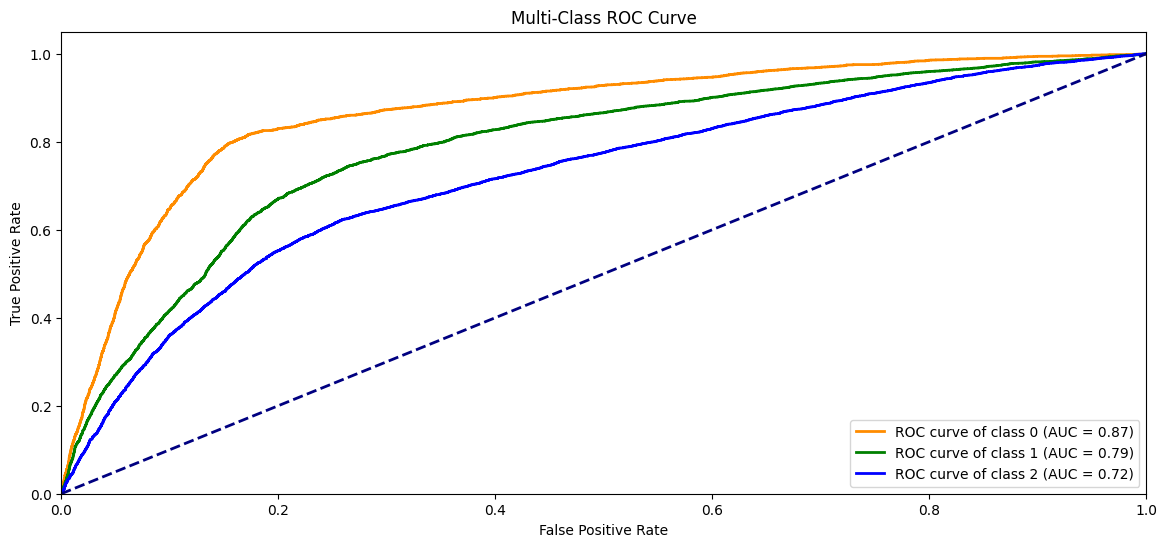

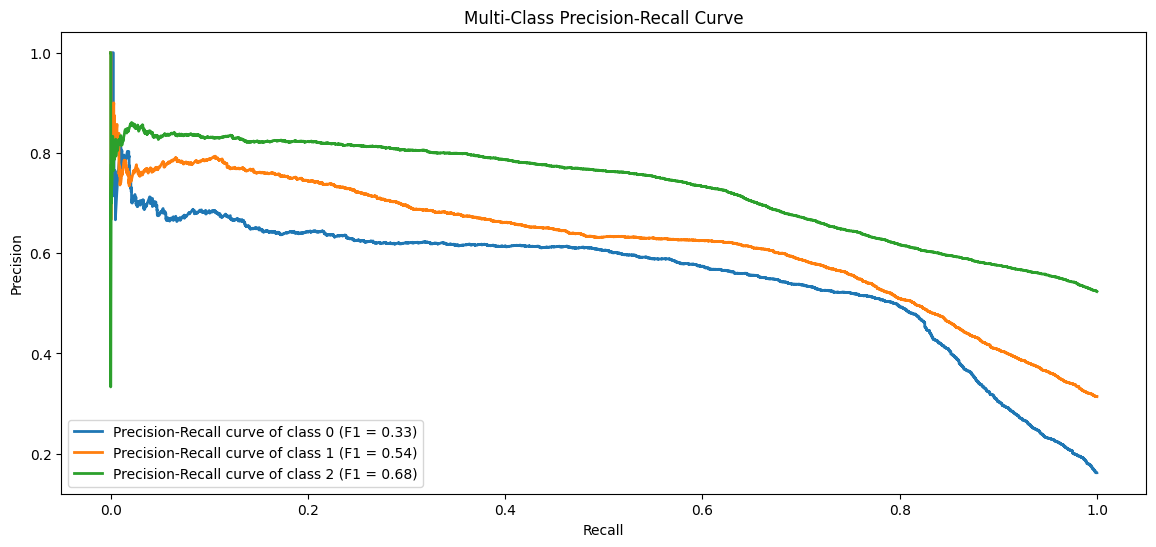

In [10]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-split the dataset with the scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply logistic regression with more iterations
log_reg = LogisticRegression(max_iter=5000, multi_class='ovr')  # OVR for multi-class
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the classification report to evaluate precision, recall, and F1-score
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Convert labels to binary format for multi-class ROC curve and Precision-Recall curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities
y_pred_proba = log_reg.predict_proba(X_test)

# ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming three classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC Curves
plt.figure(figsize=(14, 6))
colors = ['darkorange', 'green', 'blue']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curves for each class
plt.figure(figsize=(14, 6))
precision = dict()
recall = dict()
f1 = dict()

for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    f1[i] = f1_score(y_test_bin[:, i], (y_pred_proba[:, i] > 0.5).astype(int))
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve of class {0} (F1 = {1:0.2f})'.format(i, f1[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-Class Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

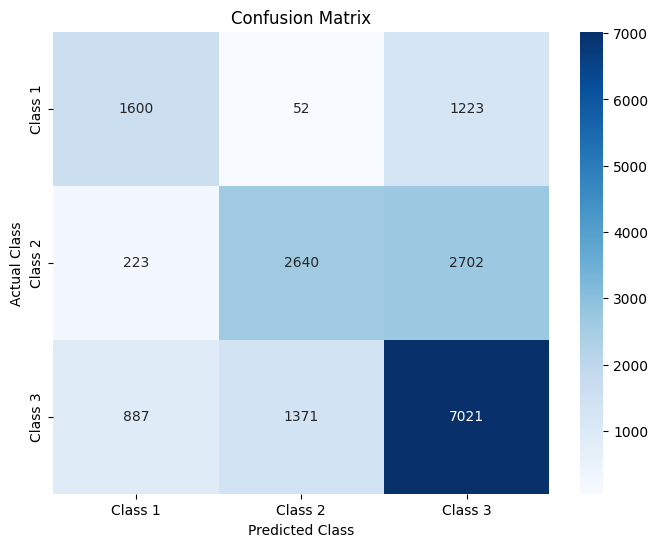

In [11]:
# Since the session was reset, let's regenerate the confusion matrix from the model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Using the previously calculated confusion matrix
conf_matrix = np.array([[1600,   52, 1223],
                        [ 223, 2640, 2702],
                        [ 887, 1371, 7021]])

# Plotting the confusion matrix using seaborn heatmap for clearer visualization
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Accuracy: 0.6342908742028331
Confusion Matrix:
 [[1617   53 1205]
 [ 234 2649 2682]
 [ 907 1399 6973]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.56      0.57      2875
           1       0.65      0.48      0.55      5565
           2       0.64      0.75      0.69      9279

    accuracy                           0.63     17719
   macro avg       0.62      0.60      0.60     17719
weighted avg       0.63      0.63      0.63     17719



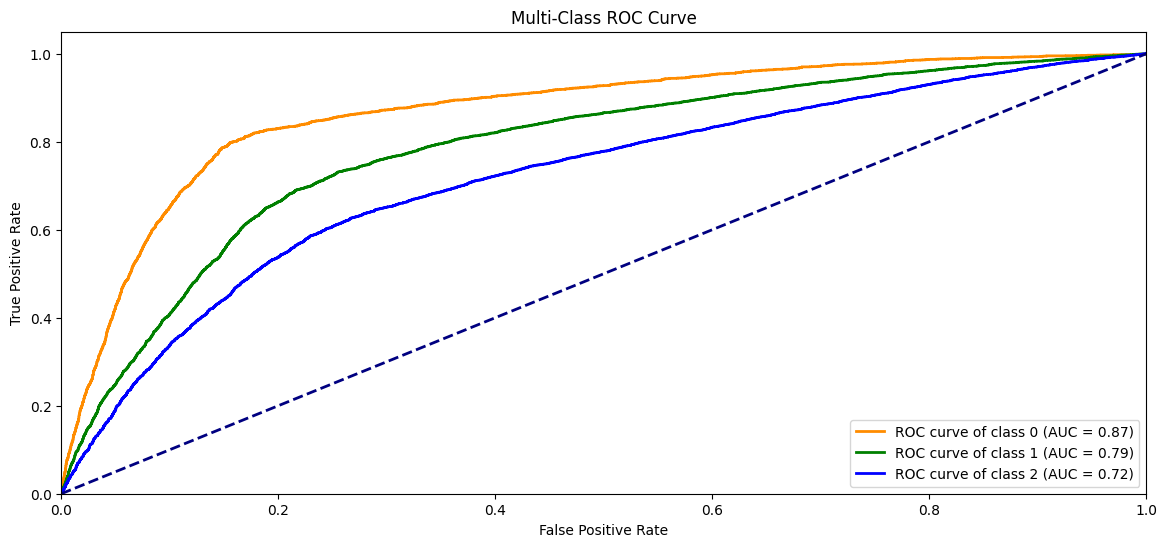

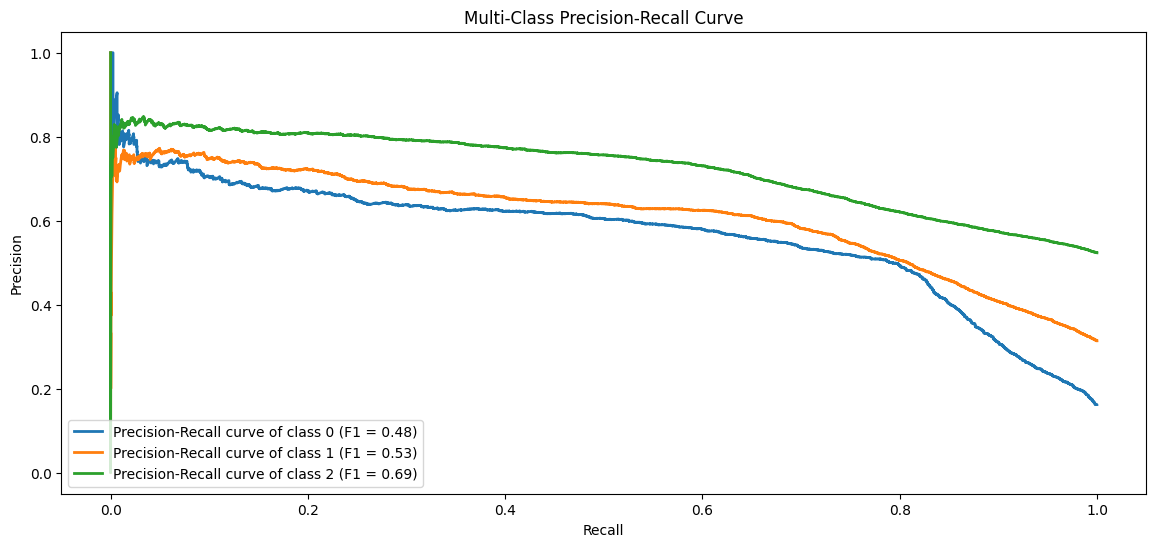

In [12]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Data preprocessing (assuming your data is already cleaned and ready)
# Apply label encoding if needed
label_encoder = LabelEncoder()

# Assuming 'Credit_Score' is the target column, replace it with the actual target name if different
categorical_columns = ['Customer_Occupation', 'Credit_Mix', 'Min_Amount_Payment', 'Payment_Behavior']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the XGBoost model with logistic regression as the base learner
xgb = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', booster='gblinear', learning_rate=0.1, n_estimators=100)

# Fit the XGBoost model
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the classification report to evaluate precision, recall, and F1-score
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Predict probabilities for ROC and Precision-Recall Curve
y_pred_proba = xgb.predict_proba(X_test)

# Convert labels to binary format for multi-class ROC curve plotting
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming three classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC Curves for each class
plt.figure(figsize=(14, 6))
colors = ['darkorange', 'green', 'blue']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curves for each class
plt.figure(figsize=(14, 6))
precision = dict()
recall = dict()
f1 = dict()

for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    f1[i] = f1_score(y_test_bin[:, i], (y_pred_proba[:, i] > 0.5).astype(int))
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve of class {0} (F1 = {1:0.2f})'.format(i, f1[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-Class Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [181]:
# Individual Component - dwan0987  - Random Forest model

In [183]:
print(df.shape)
print(list(df.columns))

(88592, 31)
['Unnamed: 0', 'Record_ID', 'Customer_ID', 'Record_Month', 'Customer_Age', 'Customer_SSN', 'Customer_Occupation', 'Annual_Income', 'Monthly_Salary', 'Bank_Accounts', 'Credit_Cards', 'Interest_Rate', 'Loans', 'Loan_Types', 'Extra_Column_1', 'Extra_Column_2', 'Extra_Column_3', 'Payment_Delay_Days', 'Delayed_Payments', 'Credit_Limit_Changes', 'Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization', 'Credit_History_Age', 'Min_Amount_Payment', 'Monthly_EMI', 'Monthly_Investment', 'Payment_Behavior', 'Monthly_Balance', 'Credit_Score']


In [184]:
def duration_to_decimal(duration):
    # Split the string to extract years and months
    parts = duration.split(' and ')
    years = int(parts[0].split(' ')[0])  # Get the number of years
    months = int(parts[1].split(' ')[0])  # Get the number of months

    # Convert months to a fraction of a year
    decimal_months = months / 12

    # Return the total in decimal years
    return years + decimal_months

# Example usage
df['Credit_History_Age'] = df['Credit_History_Age'].apply(duration_to_decimal)


<Axes: xlabel='Credit_Score'>

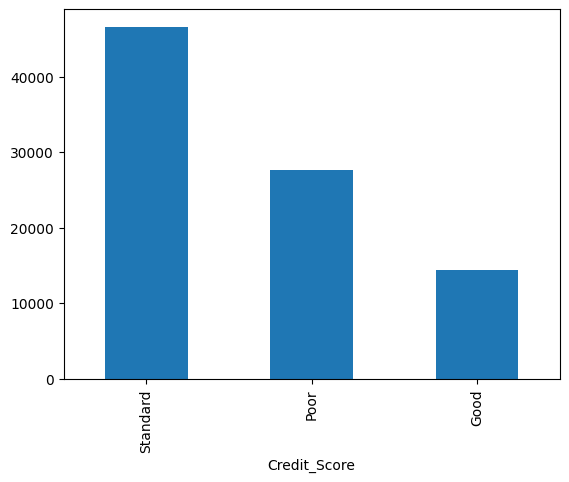

In [185]:
df.Credit_Score.value_counts().plot(kind = 'bar')


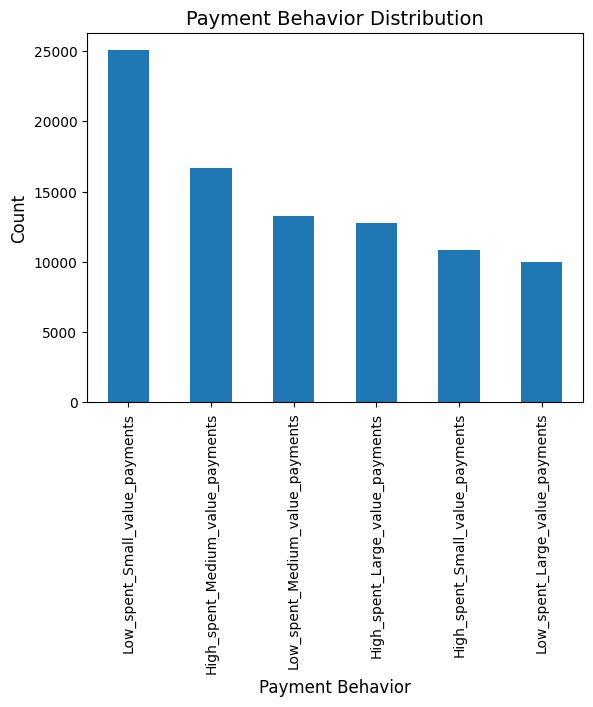

<Figure size 1000x600 with 0 Axes>

In [186]:
import matplotlib.pyplot as plt

# Create the bar plot with value counts
df.Payment_Behavior.value_counts().plot(kind='bar')

# Add labels and title
plt.title('Payment Behavior Distribution', fontsize=14)
plt.xlabel('Payment Behavior', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.figure(figsize=(10, 6))  # Increase the width to 10 (or more as needed)
# Show the plot
plt.tight_layout()
plt.show()


In [187]:
print(df.isna().sum())  # Prints the number of NaN values in each column


Unnamed: 0                  0
Record_ID                   0
Customer_ID                 0
Record_Month                0
Customer_Age                0
Customer_SSN                0
Customer_Occupation         0
Annual_Income               5
Monthly_Salary              0
Bank_Accounts               0
Credit_Cards                0
Interest_Rate               0
Loans                       0
Loan_Types                  0
Extra_Column_1          11128
Extra_Column_2          26840
Extra_Column_3          42592
Payment_Delay_Days          0
Delayed_Payments            0
Credit_Limit_Changes        0
Credit_Inquiries            0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization          0
Credit_History_Age          0
Min_Amount_Payment          0
Monthly_EMI                 0
Monthly_Investment          0
Payment_Behavior            0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [188]:
# exploratory numerical features analysis

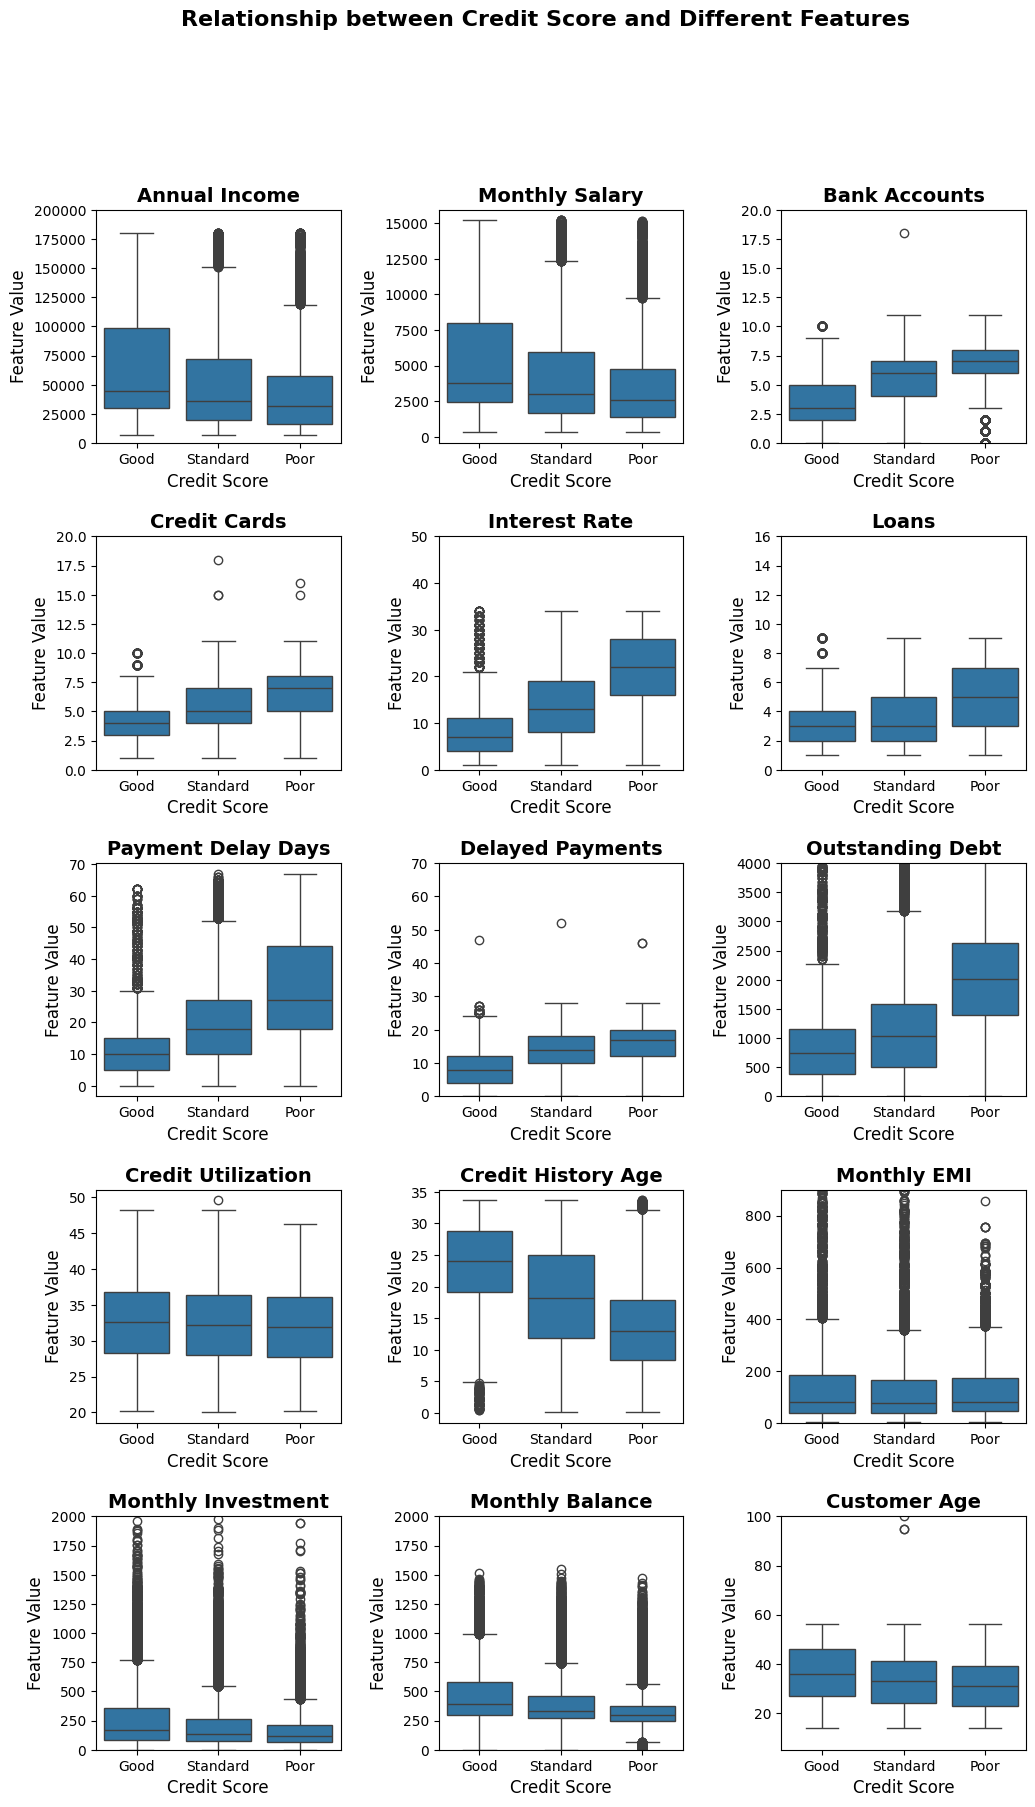

In [189]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Plot multiple box plots on the same axis
sns.boxplot(x='Credit_Score', y='Annual_Income',  data=df, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Monthly_Salary', data=df, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Bank_Accounts', data=df, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Credit_Cards', data=df, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Loans', data=df, ax=ax[5])
sns.boxplot(x='Credit_Score', y='Payment_Delay_Days', data=df, ax=ax[6])
sns.boxplot(x='Credit_Score', y='Delayed_Payments', data=df, ax=ax[7])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, ax=ax[8])
sns.boxplot(x='Credit_Score', y='Credit_Utilization', data=df, ax=ax[9])
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, ax=ax[10])
sns.boxplot(x='Credit_Score', y='Monthly_EMI', data=df, ax=ax[11])
sns.boxplot(x='Credit_Score', y='Monthly_Investment', data=df, ax=ax[12])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, ax=ax[13])
sns.boxplot(x='Credit_Score', y='Customer_Age', data=df, ax=ax[14])

#set y axis

ax[0].set_ylim(0, 200000)  # Set limits from 5 to 100 for Customer_Age
ax[2].set_ylim(0, 20)  # Set limits from 5 to 100 for Customer_Age
ax[3].set_ylim(0, 20)  # Set limits from 5 to 100 for Customer_Age

ax[4].set_ylim(0, 50)  # Set limits from 0 to 30 for interest rates
ax[5].set_ylim(0, 16)  # Set limits for loan number
ax[7].set_ylim(0, 70)  # Set limits from 0 to 20 for interest rate
ax[8].set_ylim(0, 4000)  # Set limits from 0 to 4000 for outstanding debt
ax[11].set_ylim(0, 900)  # Set limits from 5 to 100 for Customer_Age

ax[12].set_ylim(0, 2000)  # Set limits from 5 to 100 for Customer_Age
ax[13].set_ylim(0, 2000)  # Set limits from 5 to 100 for Customer_Age
ax[14].set_ylim(5, 100)  # Set limits from 5 to 100 for Customer_Age


# Add a title and labels
#plt.title('Relationship between Credit Score and Different Features')
plt.xlabel('Credit Score')
plt.ylabel('Feature Value')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a white grid
for i in range(15):
    ax[i].grid(color='white', linestyle='-', linewidth=1, alpha=0.5)

# Add a title and labels
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')

# Set the font size for all subplot titles
titles = ['Annual Income', 'Monthly Salary', 'Bank Accounts', 'Credit Cards',
          'Interest Rate', 'Loans', 'Payment Delay Days', 'Delayed Payments',
          'Outstanding Debt', 'Credit Utilization', 'Credit History Age', 'Monthly EMI',
          'Monthly Investment', 'Monthly Balance', 'Customer Age']
for i in range(15):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

    # Set the font size for all x and y labels
for i in range(15):
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

# Show the plot
plt.show()



In [190]:
# Create a copy of the original DataFrame to store cleaned data
df_cleaned = df.copy()

# List of features to process
features = ['Outstanding_Debt', 'Payment_Delay_Days', 'Monthly_Salary', 'Credit_History_Age',
            'Interest_Rate', 'Outstanding_Debt', 'Credit_History_Age']

# Loop through each feature to identify and remove outliers
for feature in features:
    # Calculate Q1 and Q3
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Identify outliers
    outliers = df_cleaned[(df_cleaned[feature] < (Q1 - 1.5 * IQR)) | (df_cleaned[feature] > (Q3 + 1.5 * IQR))]

    # Remove outliers from the DataFrame
    df_cleaned = df_cleaned[~df_cleaned[feature].isin(outliers[feature])]

In [191]:
# numerical featuers that we will drop, looking at the box plots

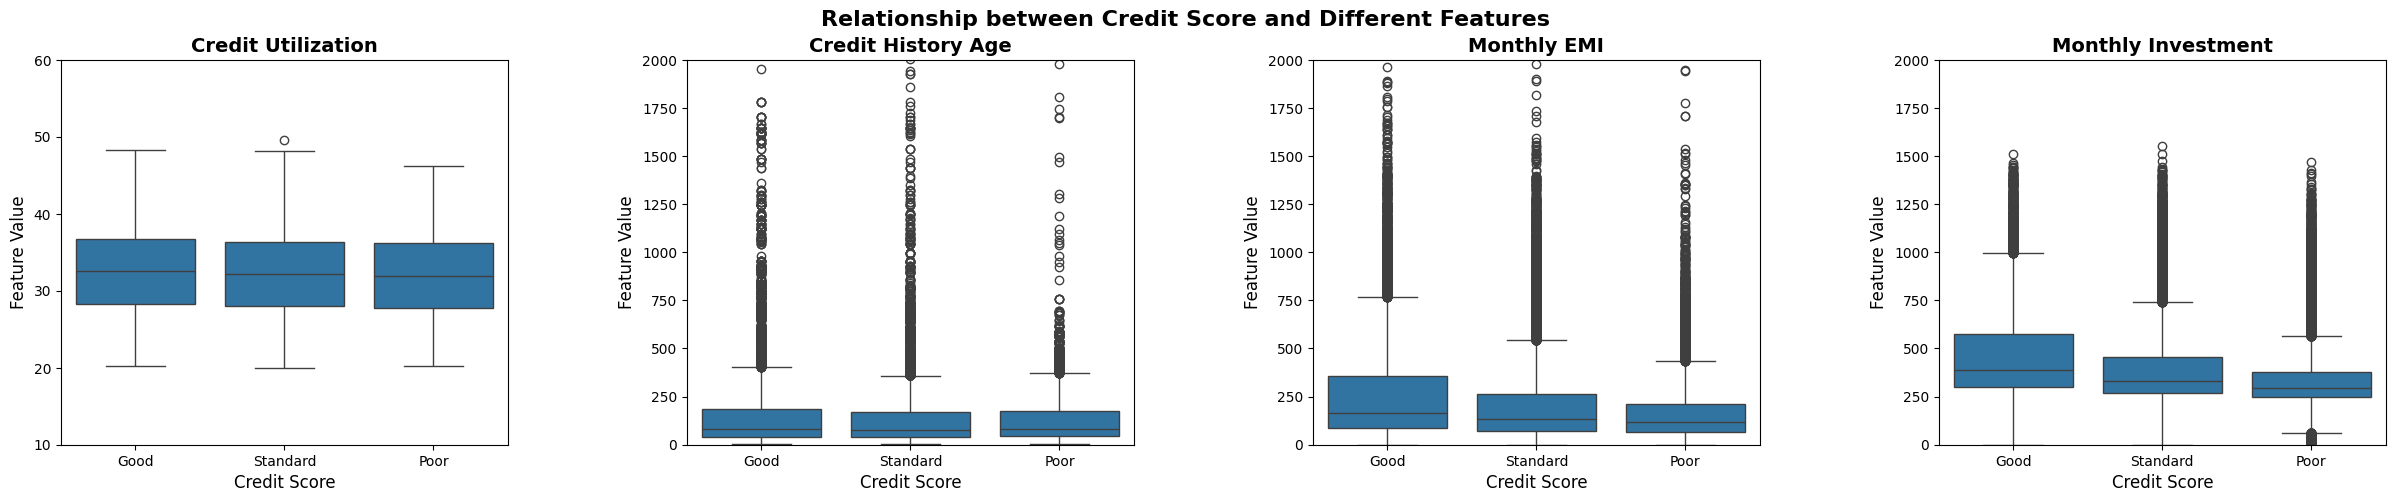

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x5 grid for subplots
fig, ax = plt.subplots(1, 4, figsize=(30, 5))

# Create boxplots in a single row
sns.boxplot(x='Credit_Score', y='Credit_Utilization', data=df, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Monthly_EMI', data=df, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Monthly_Investment', data=df, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, ax=ax[3])

# Set limits for specific plots
ax[0].set_ylim(10, 60)  # Set limits for Credit Utilization
ax[1].set_ylim(0, 2000)   # Set limits for Monthly EMI
ax[2].set_ylim(0, 2000)   # Set limits for Monthly Investment
ax[3].set_ylim(0, 2000)   # Set limits for Monthly Balance

# Add a white grid to all subplots
for i in range(4):
    ax[i].grid(color='white', linestyle='-', linewidth=1, alpha=0.5)

# Add a title and labels
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')

# Set the titles for each subplot
titles = ['Credit Utilization', 'Credit History Age', 'Monthly EMI',
          'Monthly Investment', 'Monthly Balance']
for i in range(4):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


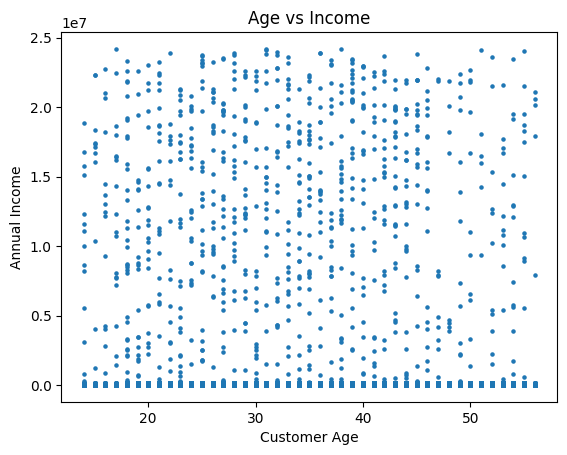

In [193]:
data = df[['Customer_Age', 'Annual_Income']]

filtered_data = df[df['Customer_Age'] < 90][['Customer_Age', 'Annual_Income']]

# Sort the filtered data by Customer_Age
data_sorted = filtered_data.sort_values(by='Customer_Age')

plt.scatter(data_sorted['Customer_Age'], data_sorted['Annual_Income'], s=5)
plt.title('Age vs Income')
plt.xlabel('Customer Age')
plt.ylabel('Annual Income')
plt.show()

# age vs income tells us almost nothing

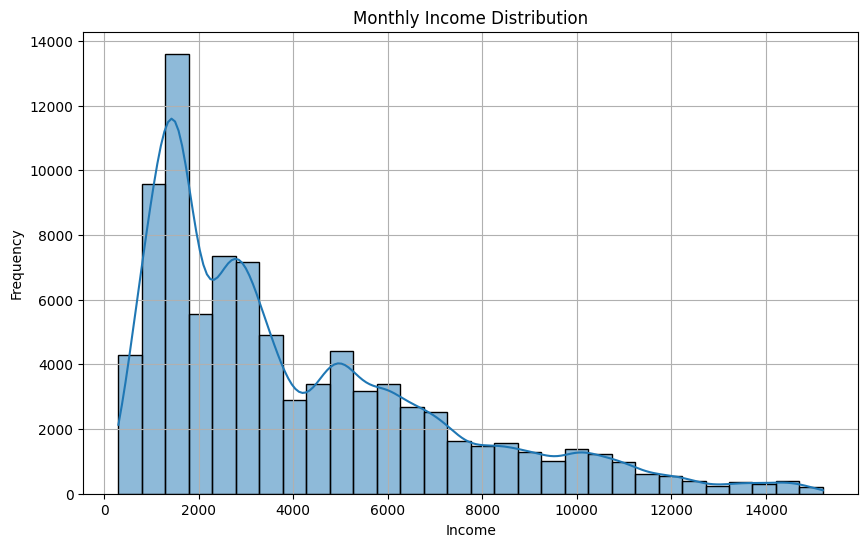

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly_Salary'], kde=True, bins=30)  # kde=True adds a smooth density curve
plt.title('Monthly Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [195]:
percentiles = df['Monthly_Salary'].quantile([0.25, 0.5, 0.75]).tolist()
print(percentiles)

[1582.092917, 3024.923333, 5781.146667]


In [196]:
# Display summary statistics for Monthly_Salary
print(df['Monthly_Salary'].describe())

# Check for unique values in Monthly_Salary
print(df['Monthly_Salary'].unique())



count    88592.000000
mean      4068.857590
std       3119.980640
min        303.645417
25%       1582.092917
50%       3024.923333
75%       5781.146667
max      15204.633330
Name: Monthly_Salary, dtype: float64
[ 1824.843333  3037.986667 12187.22     ...  3097.008333  1929.906667
  3359.415833]


Monthly_Salary_category
Medium    22172
Ultra     22153
Low       22136
High      22131
Name: count, dtype: int64


<ipython-input-197-20d4bfc4d4a7>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_credit_distribution = df.groupby(['Monthly_Salary_category', 'Credit_Score']).size().reset_index(name='Count')


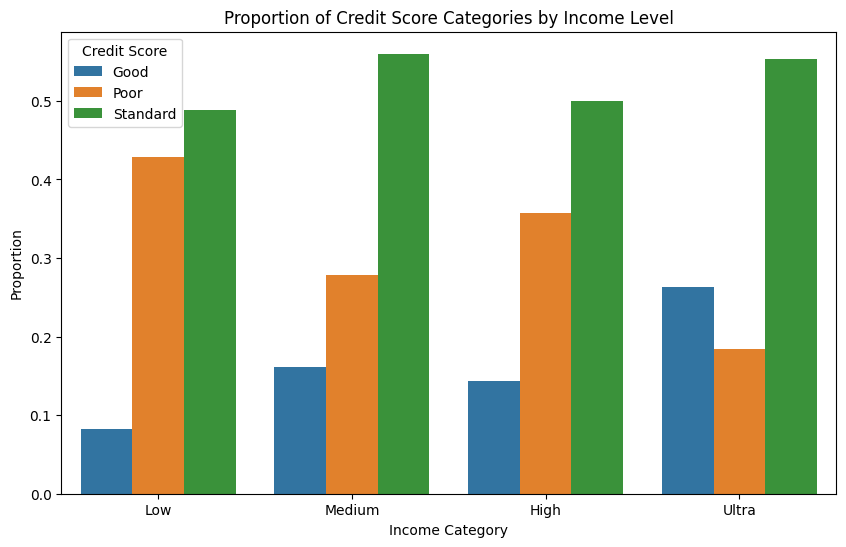

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Monthly_Salary to numeric and handle errors by coercing invalid data to NaN
df['Monthly_Salary'] = pd.to_numeric(df2['Monthly_Salary'], errors='coerce')

# Convert Credit_Score to categorical if not already
df['Credit_Score'] = df['Credit_Score'].astype('category')

# Drop rows with missing Monthly_Salary or Credit_Score
df = df.dropna(subset=['Monthly_Salary', 'Credit_Score'])

# Bin Monthly_Salary into categories (adjust bins if necessary)
df['Monthly_Salary_category'] = pd.cut(df2['Monthly_Salary'], bins=[0, 1582, 3025, 5781, 25000], labels=['Low', 'Medium', 'High', 'Ultra'])

# Check for empty bins
print(df['Monthly_Salary_category'].value_counts())

# Calculate the proportions of credit score categories for each income category
income_credit_distribution = df.groupby(['Monthly_Salary_category', 'Credit_Score']).size().reset_index(name='Count')

# Normalize to get proportions
income_credit_distribution['Proportion'] = income_credit_distribution.groupby('Monthly_Salary_category', observed=True)['Count'].transform(lambda x: x / x.sum())

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Monthly_Salary_category', y='Proportion', hue='Credit_Score', data=income_credit_distribution)
plt.title('Proportion of Credit Score Categories by Income Level')
plt.ylabel('Proportion')
plt.xlabel('Income Category')
plt.legend(title='Credit Score')
plt.show()


In [198]:
#outstanding_debt feature analysis

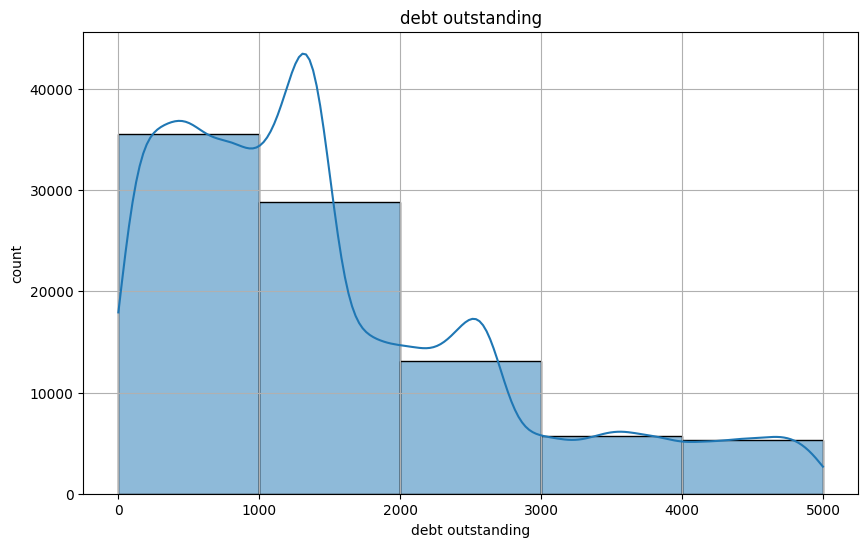

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'income' is your column for income data
# Replace with your actual DataFrame and column name
# For example: df = pd.read_csv('your_data.csv')

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Outstanding_Debt'], kde=True, bins=5)  # kde=True adds a smooth density curve
plt.title('debt outstanding')
plt.xlabel('debt outstanding')
plt.ylabel('count')
plt.grid(True)
plt.show()

In [200]:
print(df['Credit_Score'].unique())
print(df['Credit_Score'].dtypes)


['Good', 'Standard', 'Poor']
Categories (3, object): ['Good', 'Poor', 'Standard']
category


In [201]:
from sklearn.preprocessing import LabelEncoder
# Map the categorical values in Credit_Score to integers
df['Credit_Score'] = df['Credit_Score'].map({'Good': 2, 'Standard': 1, 'Poor': 0})
df_cleaned['Credit_Score'] = df_cleaned['Credit_Score'].map({'Good': 2, 'Standard': 1, 'Poor': 0})

# Check the result
print(df['Credit_Score'].unique())


[2, 1, 0]
Categories (3, int64): [2, 0, 1]


In [202]:
# numerical feature scaling

scaler = StandardScaler()
# List of numerical features to scale
numerical_features = [
    'Annual_Income', 'Monthly_Salary', 'Bank_Accounts', 'Credit_Cards',
    'Interest_Rate', 'Loans', 'Payment_Delay_Days', 'Delayed_Payments',
    'Outstanding_Debt', 'Credit_Utilization', 'Credit_History_Age',
    'Monthly_EMI', 'Monthly_Investment', 'Monthly_Balance', 'Customer_Age'
]

# Apply StandardScaler to the numerical columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [203]:
from tensorflow.keras.utils import to_categorical
# one hot encoding
#turn categorical with no ranking into numbers

# One-hot encode 'Payment_Behavior' and other categorical columns
df = pd.get_dummies(df, columns=['Payment_Behavior', 'Min_Amount_Payment', 'Customer_Occupation'], drop_first=True)

In [204]:
#label Encoder
#turn categorical variables with ranking into numbers

from sklearn.preprocessing import LabelEncoder

fit = LabelEncoder()
df['Credit_Mix'] = fit.fit_transform(df['Credit_Mix'])

print(df['Credit_Mix'].unique())
print(df['Credit_Mix'].dtype)

[1 2 0]
int64


In [ ]:
#decision tree classifier

In [205]:
print(df.columns)


Index(['Unnamed: 0', 'Record_ID', 'Customer_ID', 'Record_Month',
       'Customer_Age', 'Customer_SSN', 'Annual_Income', 'Monthly_Salary',
       'Bank_Accounts', 'Credit_Cards', 'Interest_Rate', 'Loans', 'Loan_Types',
       'Extra_Column_1', 'Extra_Column_2', 'Extra_Column_3',
       'Payment_Delay_Days', 'Delayed_Payments', 'Credit_Limit_Changes',
       'Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization', 'Credit_History_Age', 'Monthly_EMI',
       'Monthly_Investment', 'Monthly_Balance', 'Credit_Score',
       'Monthly_Salary_category',
       'Payment_Behavior_High_spent_Medium_value_payments',
       'Payment_Behavior_High_spent_Small_value_payments',
       'Payment_Behavior_Low_spent_Large_value_payments',
       'Payment_Behavior_Low_spent_Medium_value_payments',
       'Payment_Behavior_Low_spent_Small_value_payments',
       'Min_Amount_Payment_Yes', 'Customer_Occupation_Architect',
       'Customer_Occupation_Developer', 'Customer_Occupation_D

In [207]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X = df[['Bank_Accounts', 'Interest_Rate', 'Credit_Cards', 'Outstanding_Debt',
        'Delayed_Payments', 'Payment_Delay_Days', 'Loans', 'Credit_History_Age',
        'Credit_Mix', 'Min_Amount_Payment_Yes',
        'Payment_Behavior_High_spent_Medium_value_payments', 'Payment_Behavior_High_spent_Small_value_payments', 'Payment_Behavior_Low_spent_Large_value_payments',
        'Payment_Behavior_Low_spent_Medium_value_payments', 'Payment_Behavior_Low_spent_Small_value_payments', 'Customer_Occupation_Architect',
        'Customer_Occupation_Developer', 'Customer_Occupation_Doctor', 'Customer_Occupation_Engineer', 'Customer_Occupation_Entrepreneur', 'Customer_Occupation_Journalist',
        'Customer_Occupation_Lawyer', 'Customer_Occupation_Manager', 'Customer_Occupation_Mechanic', 'Customer_Occupation_Media_Manager', 'Customer_Occupation_Musician',
        'Customer_Occupation_Scientist', 'Customer_Occupation_Teacher', 'Customer_Occupation_Writer']].values  # Select features
y = df['Credit_Score'].values  # Target variable


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the classifier performance
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.78      0.77      0.78      5565
           1       0.79      0.80      0.79      9279
           2       0.75      0.74      0.74      2875

    accuracy                           0.78     17719
   macro avg       0.77      0.77      0.77     17719
weighted avg       0.78      0.78      0.78     17719



In [ ]:
#Random Forest

In [ ]:
print(df.columns.tolist())


['Unnamed: 0', 'Record_ID', 'Customer_ID', 'Record_Month', 'Customer_Age', 'Customer_SSN', 'Annual_Income', 'Monthly_Salary', 'Bank_Accounts', 'Credit_Cards', 'Interest_Rate', 'Loans', 'Loan_Types', 'Extra_Column_1', 'Extra_Column_2', 'Extra_Column_3', 'Payment_Delay_Days', 'Delayed_Payments', 'Credit_Limit_Changes', 'Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization', 'Credit_History_Age', 'Monthly_EMI', 'Monthly_Investment', 'Monthly_Balance', 'Credit_Score', 'Payment_Behavior_High_spent_Medium_value_payments', 'Payment_Behavior_High_spent_Small_value_payments', 'Payment_Behavior_Low_spent_Large_value_payments', 'Payment_Behavior_Low_spent_Medium_value_payments', 'Payment_Behavior_Low_spent_Small_value_payments', 'Min_Amount_Payment_Yes', 'Customer_Occupation_Architect', 'Customer_Occupation_Developer', 'Customer_Occupation_Doctor', 'Customer_Occupation_Engineer', 'Customer_Occupation_Entrepreneur', 'Customer_Occupation_Journalist', 'Customer_Occupation_Lawyer'

In [25]:
df.iloc[1000:1020]

,Unnamed: 0,Record_ID,Customer_ID,Record_Month,Customer_Age,Customer_SSN,Annual_Income,Monthly_Salary,Bank_Accounts,Credit_Cards,...,Customer_Occupation_Entrepreneur,Customer_Occupation_Journalist,Customer_Occupation_Lawyer,Customer_Occupation_Manager,Customer_Occupation_Mechanic,Customer_Occupation_Media_Manager,Customer_Occupation_Musician,Customer_Occupation_Scientist,Customer_Occupation_Teacher,Customer_Occupation_Writer
1000,1184,0x1cf2,CUS_0xa54b,January,-0.105677,732-98-2688,-0.057856,1.194572,-0.143171,0.031563,...,False,False,False,False,False,True,False,False,False,False
1001,1185,0x1cf3,CUS_0xa54b,February,-0.105677,732-98-2688,-0.057856,1.194572,-0.143171,0.031563,...,False,False,False,False,False,True,False,False,False,False
1002,1186,0x1cf4,CUS_0xa54b,March,-0.105677,732-98-2688,-0.057856,1.194572,-0.143171,0.031563,...,False,False,False,False,False,True,False,False,False,False
1003,1187,0x1cf5,CUS_0xa54b,April,-0.105677,732-98-2688,-0.057856,1.194572,-0.143171,0.031563,...,False,False,False,False,False,True,False,False,False,False
1004,1188,0x1cf6,CUS_0xa54b,May,-0.105677,732-98-2688,-0.057856,1.194572,-0.143171,0.031563,...,False,False,False,False,False,True,False,False,False,False
1005,1189,0x1cf7,CUS_0xa54b,June,-0.105677,732-98-2688,-0.057856,1.194572,-0.143171,0.031563,...,False,False,False,False,False,True,False,False,False,False
1006,1190,0x1cf8,CUS_0xa54b,July,-0.105677,732-98-2688,-0.057856,1.194572,-0.143171,0.031563,...,False,False,False,False,False,True,False,False,False,False
1007,1191,0x1cf9,CUS_0xa54b,August,-0.105677,732-98-2688,-0.057856,1.194572,-0.143171,0.031563,...,False,False,False,False,False,True,False,False,False,False
1008,1192,0x1cfe,CUS_0x564a,January,0.035889,763-78-4306,-0.100556,-0.472114,0.059758,0.152308,...,True,False,False,False,False,False,False,False,False,False
1009,1193,0x1cff,CUS_0x564a,February,0.035889,763-78-4306,-0.100556,-0.472114,0.059758,0.152308,...,True,False,False,False,False,False,False,False,False,False


In [208]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[['Bank_Accounts', 'Interest_Rate', 'Credit_Cards', 'Outstanding_Debt',
        'Delayed_Payments', 'Payment_Delay_Days', 'Loans', 'Credit_History_Age',
        'Credit_Mix', 'Min_Amount_Payment_Yes', 'Monthly_Salary', 'Customer_Age',
        'Payment_Behavior_High_spent_Medium_value_payments', 'Payment_Behavior_High_spent_Small_value_payments', 'Payment_Behavior_Low_spent_Large_value_payments',
        'Payment_Behavior_Low_spent_Medium_value_payments', 'Payment_Behavior_Low_spent_Small_value_payments', 'Customer_Occupation_Architect',
        'Customer_Occupation_Developer', 'Customer_Occupation_Doctor', 'Customer_Occupation_Engineer', 'Customer_Occupation_Entrepreneur', 'Customer_Occupation_Journalist',
        'Customer_Occupation_Lawyer', 'Customer_Occupation_Manager', 'Customer_Occupation_Mechanic', 'Customer_Occupation_Media_Manager', 'Customer_Occupation_Musician',
        'Customer_Occupation_Scientist', 'Customer_Occupation_Teacher', 'Customer_Occupation_Writer']].values  # Select features
y = df['Credit_Score'].values  # Target variable

# Step 1: First, split the data into train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the temp data into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have 80% train, 10% validation, and 10% test sets

model = RandomForestClassifier(n_estimators=3000, class_weight='balanced')

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=3000)

In [209]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8115124153498872


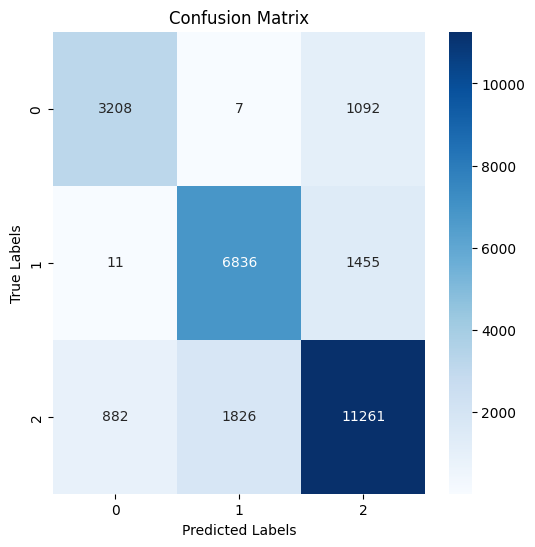

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print('Classification Report', classification_report(y_test, y_pred))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, y_pred))
print('\n')


Classification Report               precision    recall  f1-score   support

           0       0.79      0.76      0.78      2135
           1       0.80      0.84      0.82      4232
           2       0.82      0.81      0.82      6922

    accuracy                           0.81     13289
   macro avg       0.80      0.80      0.80     13289
weighted avg       0.81      0.81      0.81     13289



Confusion Matrix [[1632    2  501]
 [   3 3539  690]
 [ 429  889 5604]]




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [25, 50, 100, 200, 300],  # Number of trees
    'max_depth': [5, 10, 20, 30, None],            # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],            # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],           # Maximum number of features to consider for a split
    'bootstrap': [True, False]                  # Whether to use bootstrap samples
}

# Use RandomizedSearchCV for random search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=200, cv=5, verbose=2, random_state=42)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters found
print("Best hyperparameters: ", random_search.best_params_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; to

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}


In [210]:
# optimal model without class_weight = 'balanced'
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with the best hyperparameters
best_model = RandomForestClassifier(
    n_estimators=200,              # Number of trees
    min_samples_split=5,           # Minimum samples to split a node
    min_samples_leaf=1,            # Minimum samples at a leaf node
    max_features='log2',           # Number of features to consider for the best split
    max_depth=30,                  # Maximum depth of the trees
    bootstrap=True,                # Use bootstrap samples
    random_state=42,                # Set a seed for reproducibility
)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8139954853273138
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      2833
           1       0.82      0.82      0.82      4597
           2       0.79      0.75      0.77      1430

    accuracy                           0.81      8860
   macro avg       0.81      0.80      0.81      8860
weighted avg       0.81      0.81      0.81      8860



In [211]:
# optimal model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with the best hyperparameters
best_model = RandomForestClassifier(
    n_estimators=200,              # Number of trees
    min_samples_split=5,           # Minimum samples to split a node
    min_samples_leaf=1,            # Minimum samples at a leaf node
    max_features='log2',           # Number of features to consider for the best split
    max_depth=30,                  # Maximum depth of the trees
    bootstrap=True,                # Use bootstrap samples
    random_state=42,                # Set a seed for reproducibility
    class_weight='balanced'
)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8146726862302484
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      2833
           1       0.86      0.77      0.81      4597
           2       0.74      0.83      0.79      1430

    accuracy                           0.81      8860
   macro avg       0.80      0.83      0.81      8860
weighted avg       0.82      0.81      0.81      8860



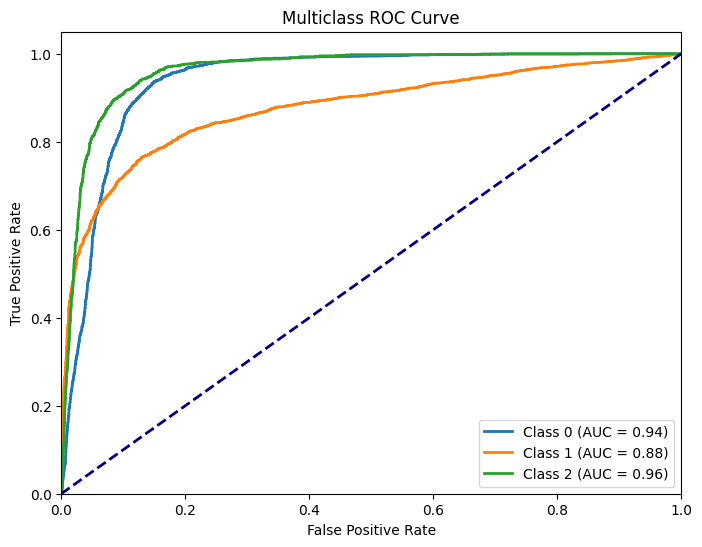

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output classes
n_classes = len(best_model.classes_)  # Assuming you have more than 2 classes
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# Predict probabilities for each class
y_prob = best_model.predict_proba(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
# Calculate precision, recall, and thresholds for the Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


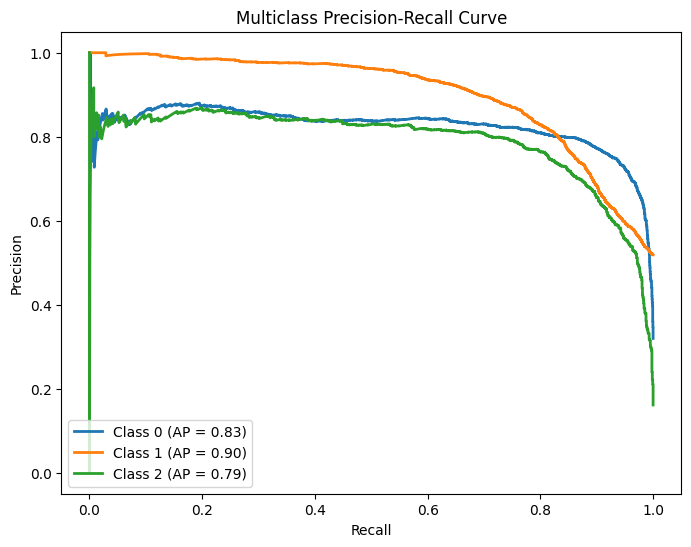

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = dict()
recall = dict()
average_precision = dict()

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

# Plot Precision-Recall curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
# with SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the RandomForestClassifier with the best hyperparameters
best_model = RandomForestClassifier(
    n_estimators=200,              # Number of trees
    min_samples_split=5,           # Minimum samples to split a node
    min_samples_leaf=1,            # Minimum samples at a leaf node
    max_features='log2',           # Number of features to consider for the best split
    max_depth=30,                  # Maximum depth of the trees
    bootstrap=True,                # Use bootstrap samples
    random_state=42                # Set a seed for reproducibility
)

# Fit the model to the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set (no need to apply SMOTE here)
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8087928212653084
Classification Report:
               precision    recall  f1-score   support

        Good       0.75      0.80      0.77      2875
        Poor       0.79      0.85      0.82      5565
    Standard       0.84      0.78      0.81      9279

    accuracy                           0.81     17719
   macro avg       0.79      0.81      0.80     17719
weighted avg       0.81      0.81      0.81     17719

